In [1]:
#####################################################################################################
#####################################################################################################
############################# LOGISTIC REGRESSION ###################################################
#####################################################################################################
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
raw_mail_data = pd.read_csv('mail_data.csv')

In [3]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [5]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
mail_data.shape

(5572, 2)

In [7]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [8]:
X = mail_data['Message']

Y = mail_data['Category']

In [9]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [10]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [12]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [13]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [15]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [16]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [19]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [20]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9676912721561588


In [21]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [22]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9668161434977578


In [23]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

input_data_features = feature_extraction.transform(input_mail) # ---- convert the texrt to feature vectors(a feature in dataset that is in numerical form)

#after that we can make prediction
prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


In [24]:
#######################################################################################################
#######################################################################################################
############################# RANDOM FOREST ALGORITHM #################################################
#######################################################################################################

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
file_path = "mail_data.csv" 
data = pd.read_csv(file_path)

In [27]:
data = data.dropna()

In [28]:
data['Category'] = data['Category'].astype('category').cat.codes

In [29]:
X = data.drop(columns=['Category']) 
y = data['Category']              

In [30]:

# Identify textual columns
text_columns = X.select_dtypes(include=['object']).columns

In [31]:
# Convert text columns to numerical using TfidfVectorizer
for column in text_columns:
    vectorizer = TfidfVectorizer(max_features=100)  
    tfidf_matrix = vectorizer.fit_transform(X[column].astype('str')).toarray()
    tfidf_df = pd.DataFrame(tfidf_matrix, columns=[f"{column}_{i}" for i in range(tfidf_matrix.shape[1])])
    X = pd.concat([X, tfidf_df], axis=1)
    X = X.drop(columns=[column])

In [32]:
X = X.apply(pd.to_numeric, errors='coerce')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
y_pred = clf.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9713004484304932

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.97      0.81      0.88       149

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



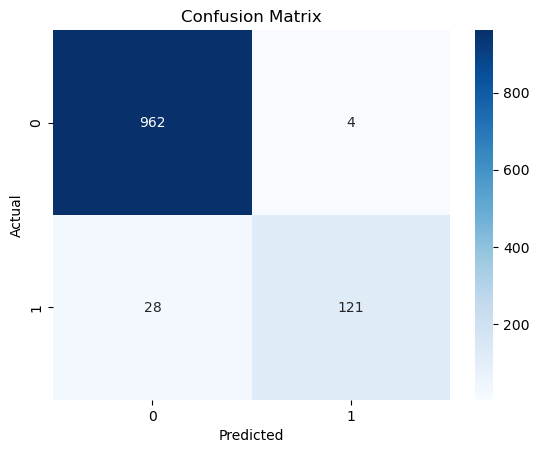

In [37]:

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

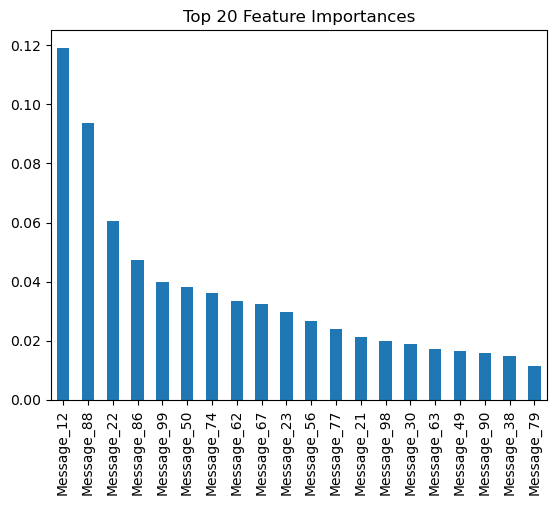

In [38]:
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).head(20).plot(kind='bar', title='Top 20 Feature Importances')
plt.show()

In [39]:
#######################################################################################################
#######################################################################################################
############################# NAIVE BAYES ALGORITHM ###################################################
#######################################################################################################

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [41]:
data = pd.read_csv('mail_data.csv')

In [42]:
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1}) # the scatter plot wont work with the alternative code


In [43]:
X = data['Message']
y = data['Category']


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
vectorizer = CountVectorizer(stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)



In [46]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)

MultinomialNB()

In [47]:
y_pred = nb_model.predict(X_test_vect)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [49]:

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.9865470852017937

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.97      0.93      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [50]:
result_df = pd.DataFrame({
    'Message': X_test,
    'Actual_Category': y_test,
    'Predicted_Category': y_pred
})

In [51]:
result_df['Message_Length'] = result_df['Message'].str.len()


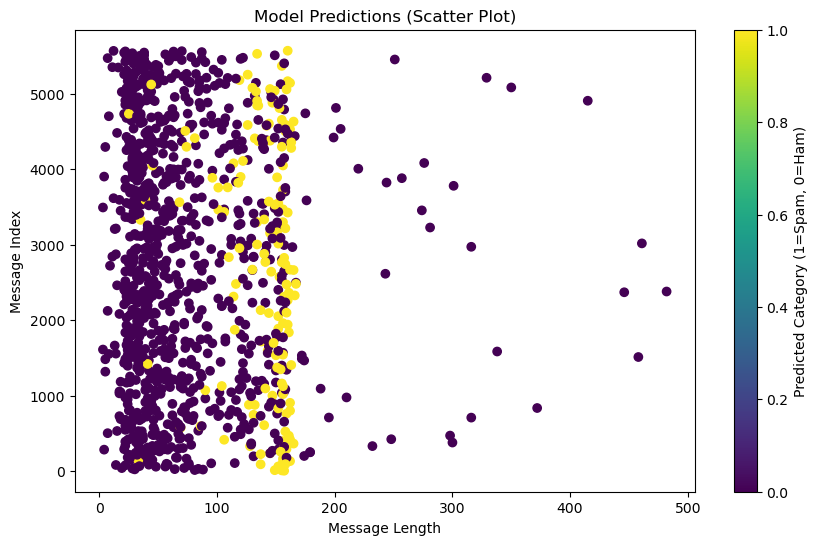

In [52]:

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(result_df['Message_Length'], result_df.index, c=result_df['Predicted_Category'], cmap='viridis')
plt.xlabel('Message Length')
plt.ylabel('Message Index')
plt.title('Model Predictions (Scatter Plot)')
plt.colorbar(label='Predicted Category (1=Spam, 0=Ham)')
plt.show()


In [53]:
input_mail = ["I've been searching for the right words to thank you"]
input_data_features = feature_extraction.transform(input_mail)


In [54]:
prediction = model.predict(input_data_features)


In [55]:
if prediction[0] == 1:
    print('Ham mail')
else:
    print('Spam mail')


Ham mail


In [57]:
input_mail = ["50%off on all devices"]

input_data_features = feature_extraction.transform(input_mail) # ---- convert the texrt to feature vectors(a feature in dataset that is in numerical form)

#after that we can make prediction
prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail
